In [1]:
!pip install rembg==2.0.56

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.4 MB/s eta 0:00:00


# Imports

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from rembg import new_session, remove

# Constant

In [3]:
DARK_CONTRAST_IMAGES = '/kaggle/input/key-images/dark-contrast/'
NON_WHITE_BACKGROUND_IMAGES = '/kaggle/input/key-images/non-white-background/'
SHADOWED_IMAGES = '/kaggle/input/key-images/shadowed/'

# Utils

In [4]:
def remove_bg(input_img, only_mask=False):
    '''
    Remove background for single images
    '''
    # Make session
    session_isnet_general_use = load_general_use_model()

    # Output image
    output_img = remove(input_img,
                        session=session_isnet_general_use,
                        only_mask=only_mask)
    return output_img


def load_general_use_model(model_name='isnet-general-use'):
    '''
    Parameters:
    model_name: str
    '''
    session = new_session(model_name)
    return session


def read_images_from_dir(dir_path):
    images = []
    for filename in os.listdir(dir_path):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img_path = os.path.join(dir_path, filename)
            try:
                images.append(cv2.imread(img_path))
            except Exception as e:
                print(f"Error opening {filename}: {e}")
    return images


def plt_img(img_data, cmap='BGR'):
    '''
    cmap:
      * 'gray' (Grayscale)
      * 'binary' (Binary)
    '''
    if cmap == 'BGR':
        img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
        plt.imshow(img_data)
    else:
        plt.imshow(img_data, cmap=cmap)
    plt.axis('on')
    plt.show()
    
    
def plt_grid(img0, img1, img2, img3, figsize=(6, 2)):
    fig, axes = plt.subplots(1, 4, figsize=figsize)

    # Display each image in the grid
    axes[0].imshow(img0, cmap='gray')
    axes[0].axis('off')

    axes[1].imshow(img1, cmap='gray')
    axes[1].axis('off')

    axes[2].imshow(img2, cmap='gray')
    axes[2].axis('off')
    
    axes[3].imshow(img3, cmap='gray')
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
def contrast_using_histogram_equalization(gray_img):
    '''
    This technique enhances the contrast of images by spreading out 
    the most frequent intensity values. It can be particularly useful 
    in improving the visibility of features under varying lighting conditions.
    '''
    return cv2.equalizeHist(gray_img)


def contrast_using_clahe(gray_img):
    '''
    CLAHE (Contrast Limited Adaptive Histogram Equalization) 
    CLAHE works on small regions in the image, making it more effective 
    for images with varying lighting conditions. It can be more robust for 
    images with varying lighting conditions.
    '''
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(gray_img)


def contrast_using_gamma(image, gamma=2.0):
    '''
    Adjusting the gamma value of an image can help in normalizing the lighting conditions.
    '''
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)


def contrast_using_dynamic_gamma(image):
    '''
    Dynamically adjust the gamma value of an image based on its mean pixel intensity.
    '''
    mean_intensity = np.mean(image)

    # Determine the gamma value based on mean intensity
    # You can adjust these thresholds and gamma values based on your requirements
    if mean_intensity < 50:
        gamma = 2.5  # Very dark image
    elif mean_intensity < 100:
        gamma = 2.0  # Dark image
    elif mean_intensity < 150:
        gamma = 1.7  # 1.5 - Slightly dark image
    elif mean_intensity < 200:
        gamma = 1.5  # 1.0 - Normal image
    else:
        gamma = 0.5  # Bright image

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table), gamma


def convert_gray_to_rgb(gray_img):
    grayscale_image = gray_img.astype(np.uint8)
    grayscale_image = cv2.normalize(grayscale_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    rgb_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2RGB)
    return rgb_image

# Code

In [6]:
dark_images = read_images_from_dir(DARK_CONTRAST_IMAGES)
non_white_images = read_images_from_dir(NON_WHITE_BACKGROUND_IMAGES)
shadowed_images = read_images_from_dir(SHADOWED_IMAGES)

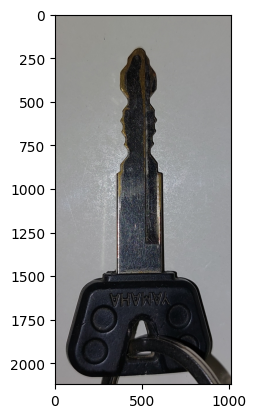

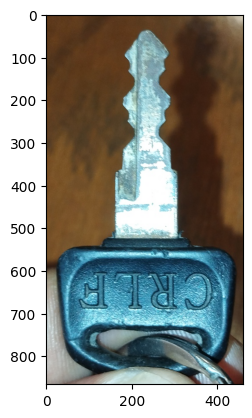

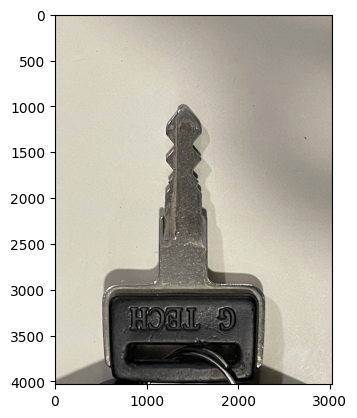

In [7]:
plt_img(dark_images[0])
plt_img(non_white_images[0])
plt_img(shadowed_images[0])

### 1. Comparison on Dark Images

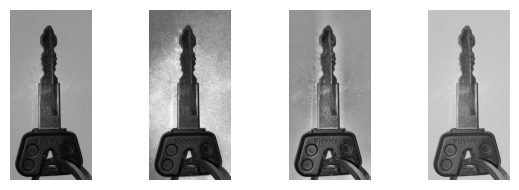

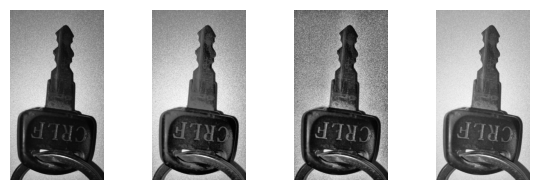

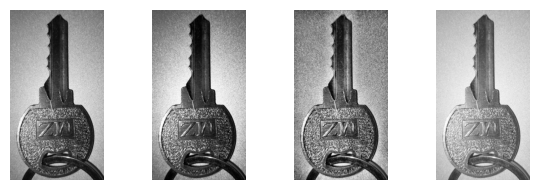

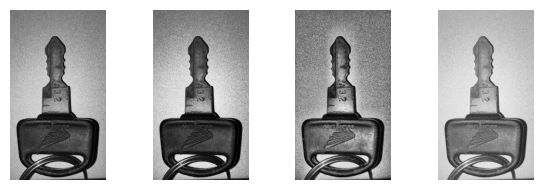

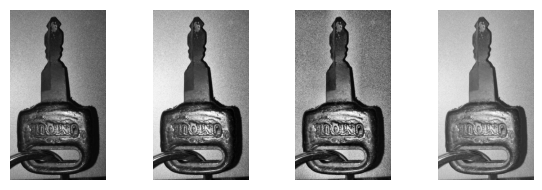

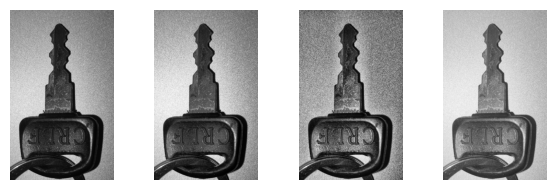

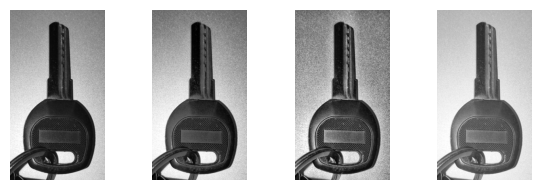

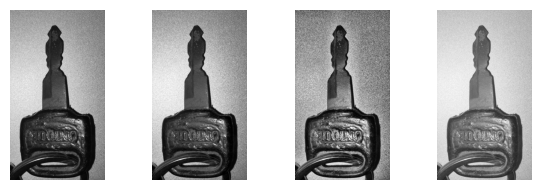

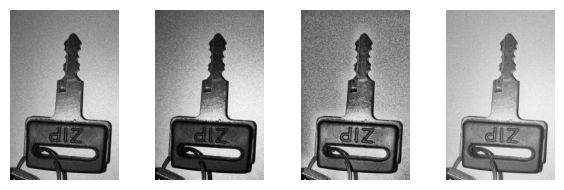

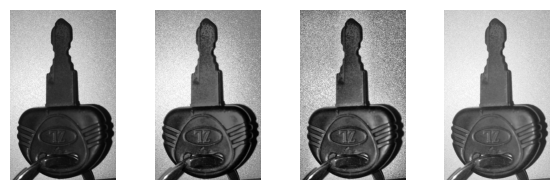

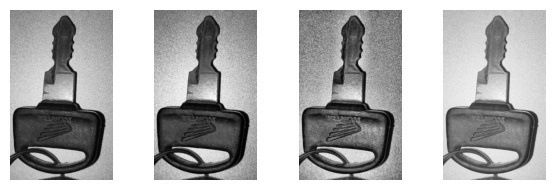

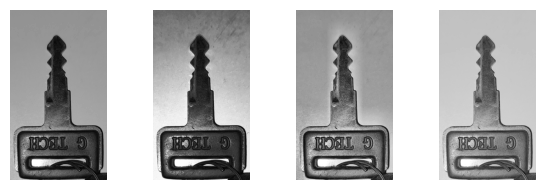

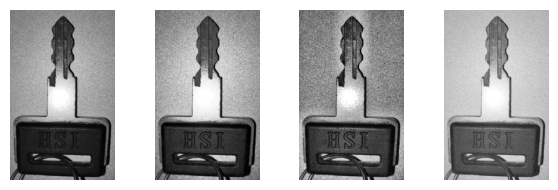

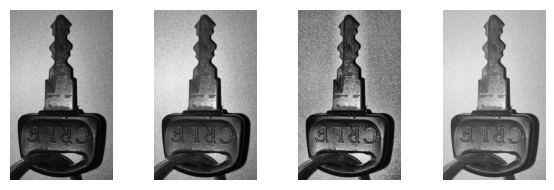

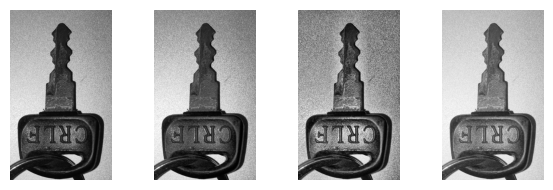

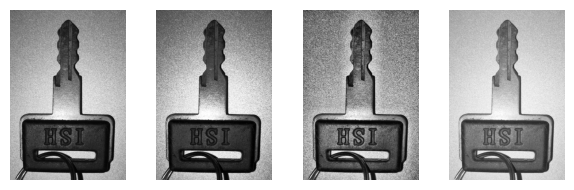

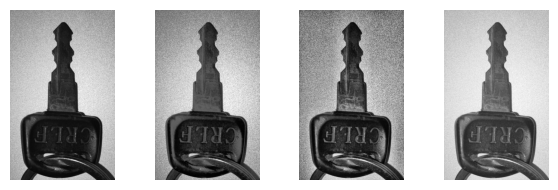

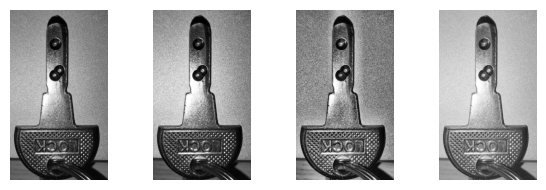

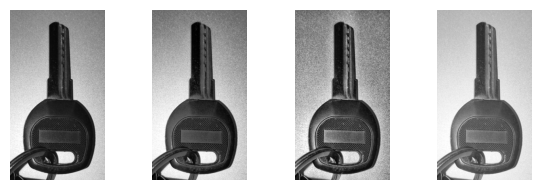

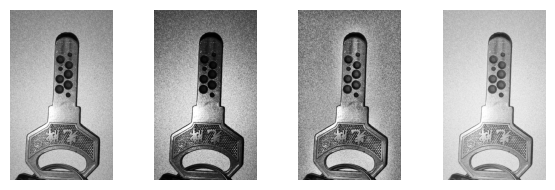

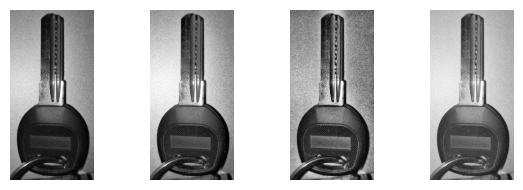

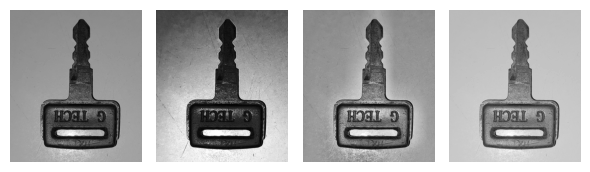

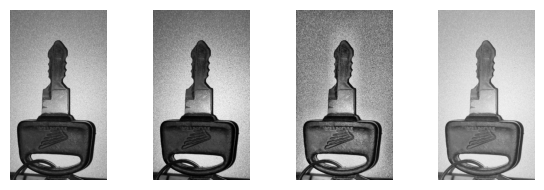

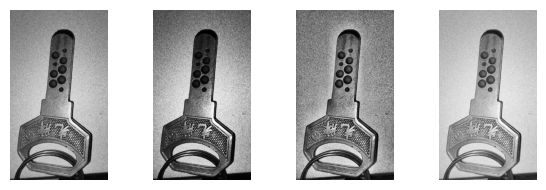

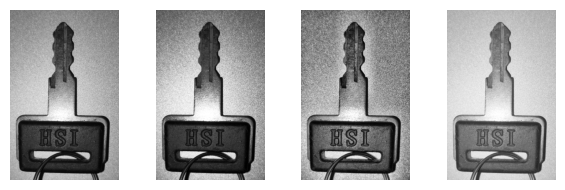

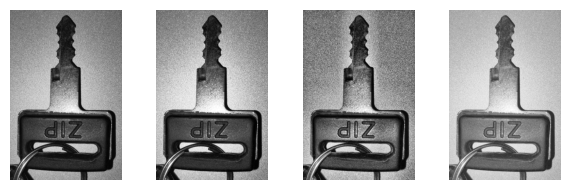

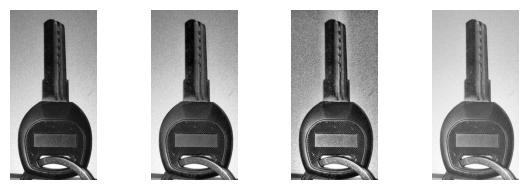

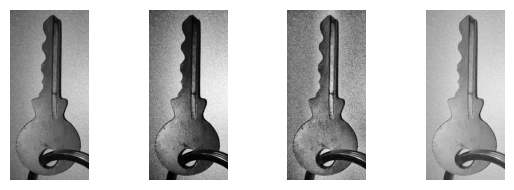

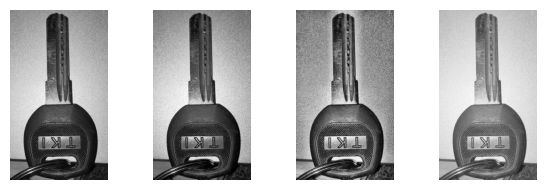

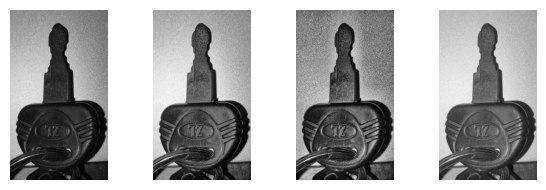

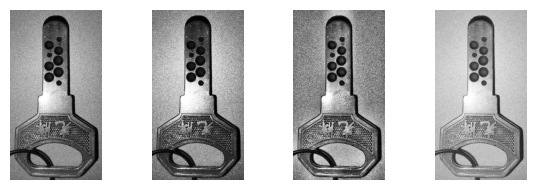

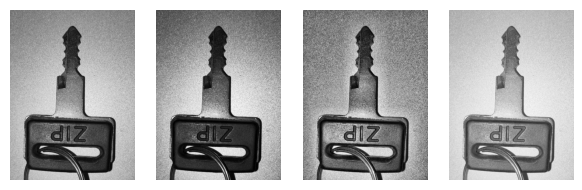

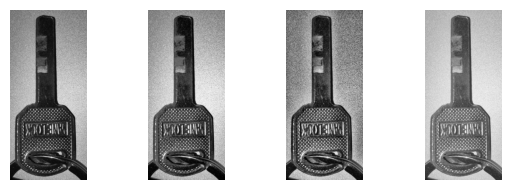

In [8]:
for img in dark_images:
    img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Contrast using different different techniques
    result_hist_eq = contrast_using_histogram_equalization(img_grayscale)
    result_clahe = contrast_using_clahe(img_grayscale)
    result_gamma = contrast_using_gamma(img_grayscale)

    # Plt
    plt_grid(img_grayscale, result_hist_eq, result_clahe, result_gamma)

### 2. Comparison on Shadow Images

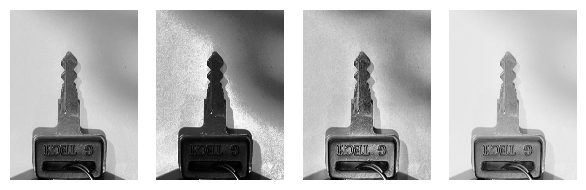

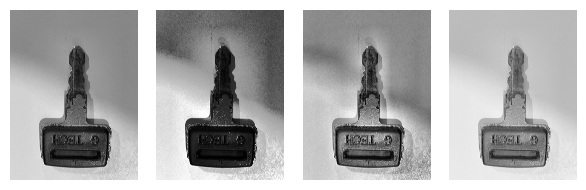

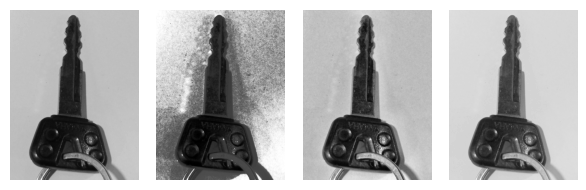

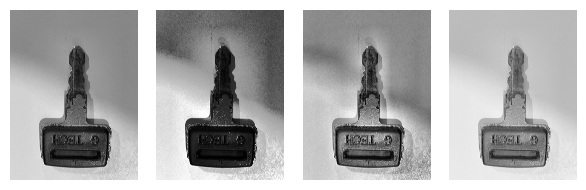

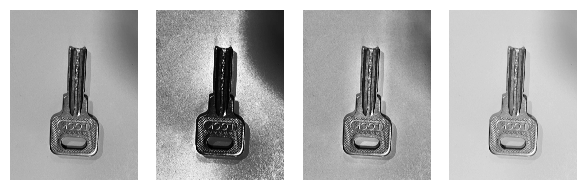

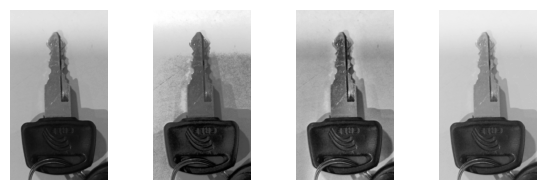

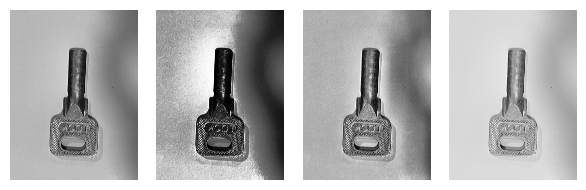

In [9]:
for img in shadowed_images:
    img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Contrast using different different techniques
    result_hist_eq = contrast_using_histogram_equalization(img_grayscale)
    result_clahe = contrast_using_clahe(img_grayscale)
    result_gamma = contrast_using_gamma(img_grayscale)

    # Plt
    plt_grid(img_grayscale, result_hist_eq, result_clahe, result_gamma)

### 3. Comparison on Non-White Background Images

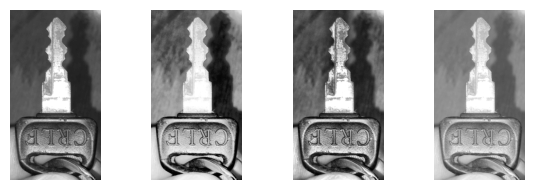

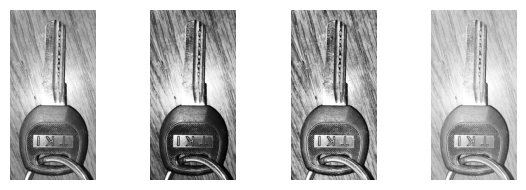

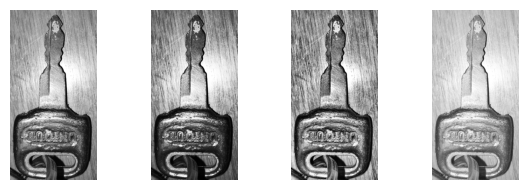

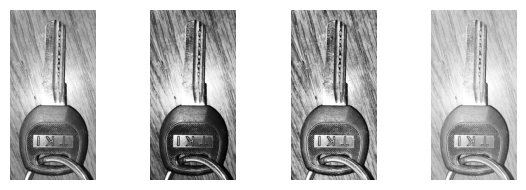

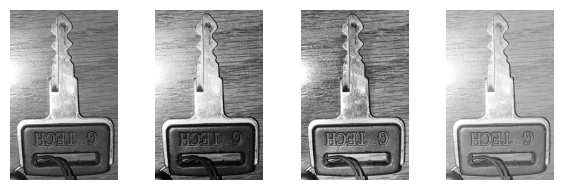

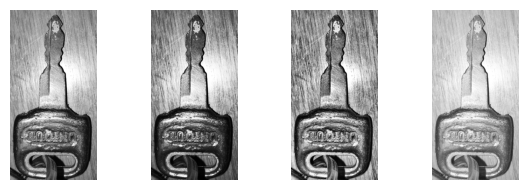

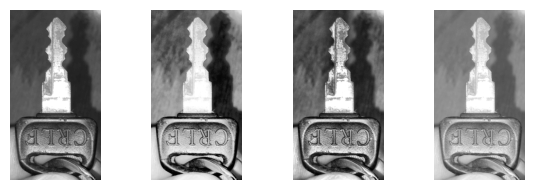

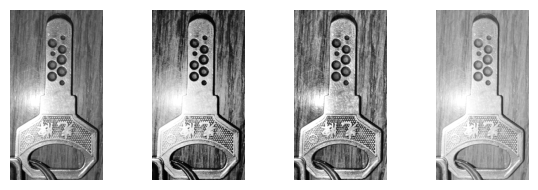

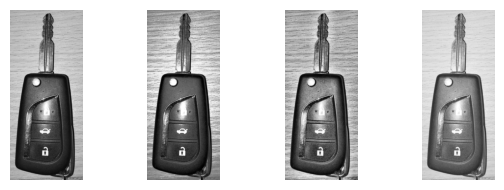

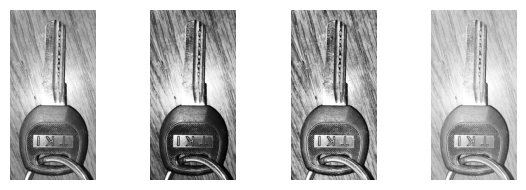

In [10]:
for img in non_white_images:
    img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Contrast using different different techniques
    result_hist_eq = contrast_using_histogram_equalization(img_grayscale)
    result_clahe = contrast_using_clahe(img_grayscale)
    result_gamma = contrast_using_gamma(img_grayscale)

    # Plt
    plt_grid(img_grayscale, result_hist_eq, result_clahe, result_gamma)

### 4. Shadow removal (using dynamic gamma)

1.5


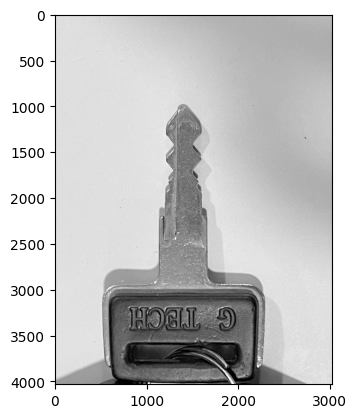

1.7


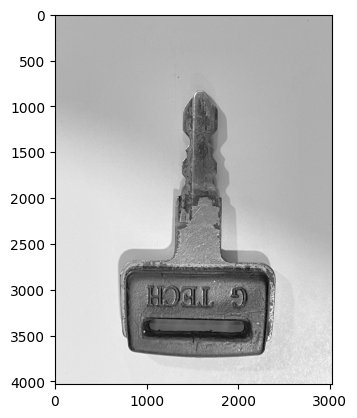

1.5


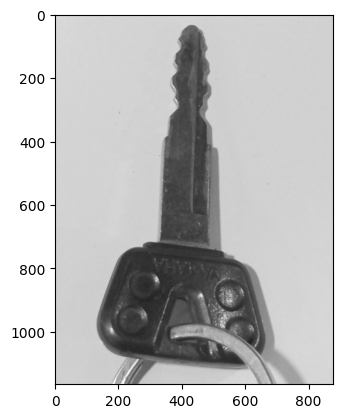

1.7


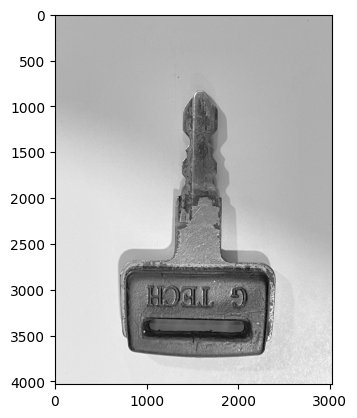

1.5


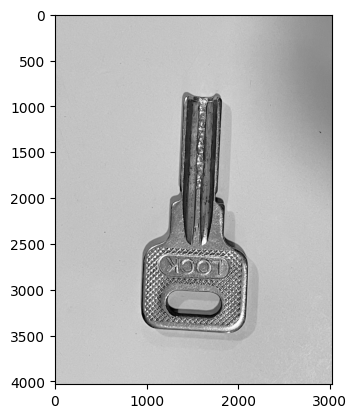

1.7


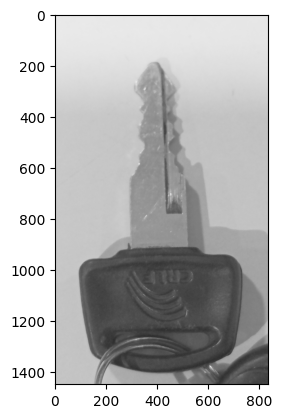

1.5


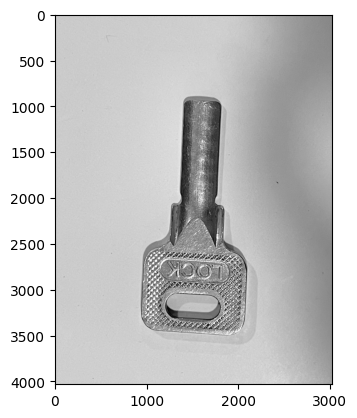

In [11]:
for img in shadowed_images:
    img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    adjusted_img, gamma = contrast_using_dynamic_gamma(img_grayscale)
    print(gamma)
    plt_img(adjusted_img)